# Question 1A

In [67]:
!wget https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt

--2023-03-01 11:36:59--  https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt
Resolving course.ccs.neu.edu (course.ccs.neu.edu)... 129.10.117.35
Connecting to course.ccs.neu.edu (course.ccs.neu.edu)|129.10.117.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255541 (250K) [text/plain]
Saving to: ‘f150_motor_distributors.txt.2’

f150_motor_distribu 100%[===================>] 249.55K  --.-KB/s    in 0.1s    

2023-03-01 11:36:59 (1.89 MB/s) - ‘f150_motor_distributors.txt.2’ saved [255541/255541]



In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
data = np.loadtxt('f150_motor_distributors.txt', delimiter=',')
print(data)

[[-11.96999577  -8.03962819]
 [-26.96141582  -6.96210943]
 [-12.91584891  -1.37894148]
 ...
 [ 12.92550271  -0.10319682]
 [-34.33677838   4.4057531 ]
 [-26.81273855  -1.63995599]]


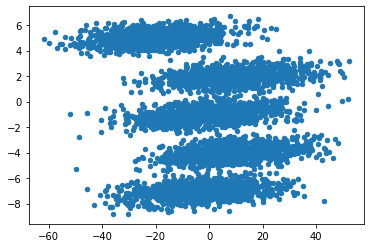

In [69]:
X = np.loadtxt("f150_motor_distributors.txt",delimiter=",")
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.show()

In [70]:
def kmeans(data, centroid, k):
  #loop for 100 iterations
  for n in range(100):
    #init the row = len(data), col = 5 grid, to save all the calculated distances 
    #and find which index is smallest so we can know which centroid close to it
    all_distances = np.zeros((len(data), len(centroid)))
    #now start at each data point to compute the distance to each centroid
    for i in range(len(data)):
      for j in range(k):
        #calculate two points distance
        all_distances[i][j] = np.sqrt(np.sum((data[i]-centroid[j])**2))
    
    #once collect all the distances to each centroid, we will need to get the shortest one index
    #which indicate that point close to which centroid
    group = np.zeros(len(data))
    for x in range(len(all_distances)):
      minDistance = float('inf')
      index = 0
      for y in range(len(all_distances[0])):
        if all_distances[x][y] < minDistance:
          minDistance = all_distances[x][y]
          index = y
      group[x] = index
    
    #re-compute the centroid
    for p in range(k):
      #loop each index of k and group all the same index's data together and get the mean
      #using axis=0 to get col's mean
      centroid[p] = np.mean(data[group == p], axis=0)
      
  return centroid, group

In [71]:
#call function and pass the param we have
init_centroids = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])
centroid, group = kmeans(data, init_centroids, 5)

# 1B

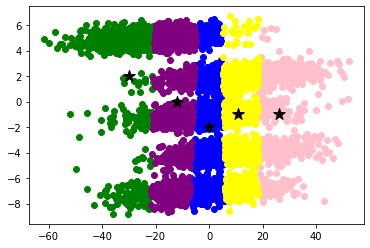

In [72]:
#draw image
colors = ['pink', 'green', 'blue', 'yellow', 'purple']
for i in range(5):
  idx = np.where(group == i)
  plt.scatter(data[idx, 0], data[idx, 1], c=colors[i])
plt.scatter(centroid[:, 0], centroid[:, 1], color='k', marker='*', s=150)
plt.show()

# 1C

The reason why we are  choosing 5 is because from the scatter graph, we can easily see they form 5 groups in there. And after I plot my result clusters, northing really changed, all the data still dispersed out as my initial scatter graph. And I dont think there is initialization problem for cluster. Since we are keep calculating the distance from each data point to centriod, and always keep the smallest value and re-compute the centriod. So even with different cluster initialization, we will still get the similar result. So maybe should try different method. 




# Question 2A

**Implement KMeans clustering Algorithm Mahalanobis Distance**

1.   Initialise a random point from the dataset as centroid.
2.   Group all data into clusters around the centroids confirmed. In this case since cluster information is not available, we will use Euclidean Distance to group clusters.
3.   Select the farthest data point, which is not already selected as a cluster, from the chosen centroids. Use Mahalanobis Distance here and add the furthest chosen data point as another centroid.
4.   Repeat Steps 2 and 3 till we get as many centroids as clusters that we need.
5.   After completing the initialization of centroids, we will group the dataset into clusters using Euclidean Distance again since we do not have the cluster information.
6.   Find the mean of all clusters and reinitialise centroids based on the means of each cluster.
7.   Regroup the clusters using Mahalanobis Distance.
8.   Repeat Steps 6 & 7, till the new group of clusters and old group of clusters are identical or till a specific number of times (given by n_estimators, traditionally used by KMeans)






In [73]:
#P is a known relationship through Ford’s quality control analysis
P = np.array([[10, 0.5], [-10,0.25]])
#calculate the inverse of the matrix
R = np.linalg.inv(P.T @ P) 

In [74]:
#calculate Mahalanobis Distance
def mahalanobis(x,y,R):
  return (x-y).T @ R @ (x-y)

#kmeans founction
def kmeans(data, centroid, k):
  max_iterstion = 100000
  for t in range(max_iterstion):
    #build empty map to store the distance bwtween data[i] and centroid[i]
    all_distances = np.zeros((len(data), len(centroid)))
    for i in range(k):
      for j in range(len(data)):
        #calculate distance
        all_distances[j][i] = mahalanobis(data[j], centroid[i], R)
    #get the min distance for data[i] from its all 5 distances
    group = np.zeros(len(data))
    for x in range(len(all_distances)):
      minDistance = float('inf')
      index = 0
      for y in range(len(all_distances[0])):
        if all_distances[x][y] < minDistance:
          minDistance = all_distances[x][y]
          index = y
      group[x] = index
    #re-compute centroid
    new_centroid = np.ndarray((k,data.shape[1]))
    for p in range(k):
      #loop each index of k and group all the same index's data together and get the mean
      #using axis=0 to get col's mean
      new_centroid[p]= np.mean(data[group == p], axis=0)
    #compare new_centroid with centroid
    if np.array_equal(centroid, new_centroid):
      break
    centroid = new_centroid
  return centroid, group

In [75]:
#call the function
init_centroids = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])
centroid, group = kmeans(data, init_centroids, 5)

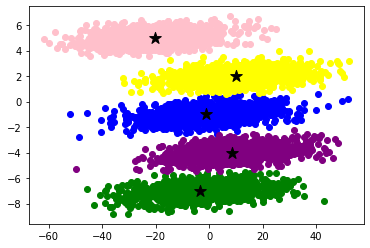

In [76]:
#draw image
colors = ['pink', 'green', 'blue', 'yellow', 'purple']
for i in range(5):
  idx = np.where(group == i)
  plt.scatter(data[idx, 0], data[idx, 1], c=colors[i])
plt.scatter(centroid[:, 0], centroid[:, 1], color='k', marker='*', s=150)
plt.show()

Ans: ***From this graph, I notice that this new method helps our kmeans function to find a better cluster***

# 2B

[[ 0.99838317  0.05684225]
 [-0.05684225  0.99838317]]
[[-10.33254906  -7.6356903 ]
 [-25.36097916  -7.41205973]
 [-11.65548133  -1.03953719]
 ...
 [ 14.07157308   1.70302537]
 [-33.3705919    3.51819072]
 [-25.51506544  -2.09006015]]


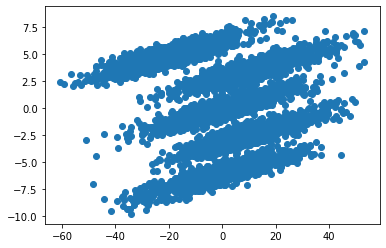

In [77]:
def pca(X):
  #mean centering
  mean = np.mean(X, axis=0)
  updated = X - mean

  #covariance
  cov = np.cov(updated.T)

  #eigenvectors, eigenvalues
  eigenvalues, eigenvectors = np.linalg.eig(cov)
  print(eigenvectors)

  #sort eigenvectors
  #np.argsort returns an array of indices of the same shape.
  sorted_idx = np.argsort(eigenvalues)[::-1]
  sorted_eigenvalues = eigenvalues[sorted_idx]
  sorted_eigenvectors = eigenvectors[:, sorted_idx]

  #transform the data
  component = np.dot(updated, sorted_eigenvectors)
  print(component)

  plt.scatter(component[:, 0], component[:, 1])
  plt.show()

pca(data)

# 2C

[[ 0.99993527 -0.01137789]
 [ 0.01137789  0.99993527]]
[[  7.25405752  -0.25378307]
 [-18.11417956  -0.68829451]
 [ 27.23950349  -0.76561297]
 ...
 [  5.98078814   0.21199726]
 [  8.49049436   0.21735037]
 [-13.9396063   -0.44222502]]


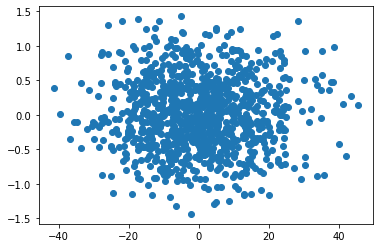

[[ 0.99992533 -0.01222027]
 [ 0.01222027  0.99992533]]
[[ -8.73419248  -0.91529791]
 [-23.71132555   0.34533961]
 [  1.94266087   0.75298475]
 ...
 [  6.37240317  -0.70787872]
 [-15.07539706   0.44106933]
 [  0.90286284  -0.33686259]]


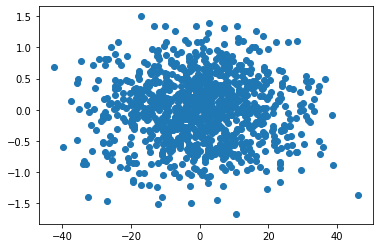

[[ 0.99990986 -0.01342629]
 [ 0.01342629  0.99990986]]
[[-11.82317836  -0.22101684]
 [ -7.97251269  -0.07352572]
 [-21.79151461   0.27086357]
 ...
 [-15.03445302  -0.59867838]
 [ 14.03297252   0.70765947]
 [-25.72231983  -0.29542422]]


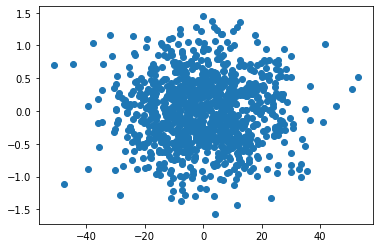

[[ 0.99993306 -0.01157047]
 [ 0.01157047  0.99993306]]
[[ 12.50154109  -0.080114  ]
 [ 26.88083768   0.15701845]
 [-12.34056372  -0.61900941]
 ...
 [ 28.29556699  -0.14442832]
 [ -8.76609494   0.96638809]
 [ -3.12687729  -0.41684377]]


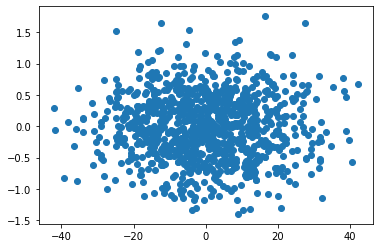

[[ 0.99989374 -0.01457781]
 [ 0.01457781  0.99989374]]
[[-25.99638961  -0.96756674]
 [-58.71301722  -0.41374627]
 [ -8.42892305  -0.14539332]
 ...
 [  1.42435118  -0.82899984]
 [-24.31180609  -0.48532642]
 [ -0.59071656  -0.68142565]]


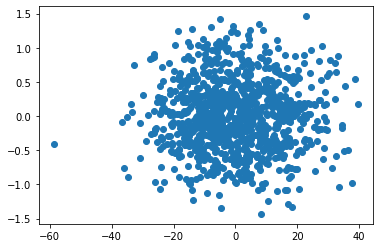

In [78]:
#run pca function for each cluste
#pass in data which has same group number
for i in range(5):
  idx = np.where(group == i)
  pca(data[idx])

Ans: ***They are not the same as the aggregate data, but they are the same as each other***

# 2D

In [79]:
vals,vec = np.linalg.eig(P.T)
S = np.diag(vals)
V = vec
P_=V@S
P_

array([[9.44301625, 0.58344264],
       [0.51282107, 0.53717161]])

In [80]:
np.linalg.eig( P.T @ P )

(array([200.031294,   0.281206]), array([[ 0.99992166, -0.01251662],
        [ 0.01251662,  0.99992166]]))

From data above, we can get the relationship as P′ =ΛΦ = P.TΦ. And the eigenvectos of this equation np.linalg.eig( P.T @ P ) had very similar values as each individual cluster components. And P' is still a good projection matrix that separates out the data.


1.   cluster1 [[ 0.99993527 -0.01137789]
 [ 0.01137789  0.99993527]]
2.   cluster2 [[ 0.99992533 -0.01222027]
 [ 0.01222027  0.99992533]]
3.   cluster3 [[ 0.99990986 -0.01342629]
 [ 0.01342629  0.99990986]]
4.   cluster4 [[ 0.99993306 -0.01157047]
 [ 0.01157047  0.99993306]]
5.   cluster5 [[ 0.99989374 -0.01457781]
 [ 0.01457781  0.99989374]]

